<a href="https://colab.research.google.com/github/JFGoes/PCT30038--CalculoNumerico/blob/master/MetodoGauss_Seidel_Relaxacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
"""
Método de Gauss-Seidel.ipynb
Autor: Prof. Josecley Fialho Góes
Data da última alteração: 01/12/2022
"""

import numpy as np
import matplotlib.pyplot as plt


In [107]:
def GSeidel(A,b,x,imax,es,rlambda):
  """
  Método de Gaus-Seidel com relaxamento: xi_novo = λxi_novo + (1 − λ)xi_velho
  Implementado a partir do livro de Métodos Numéricos para engenharia, pag 255.
  autores: Steven C. Chapra e Raymond P. Canale
  Edição: 5ª

  Variáveis de entrada:
  A           -- Matriz de coeficientes
  b           -- Vetor Independente
  x           -- Vetor chute inicial

  variáveis de Saída:
  sol         -- Vetor solução
  solx        -- Vetor solução por iteração
  iter        -- Qtde de iterações
  """
  # Melhorar a precisão de float para double
  A = A.astype('double') 
  b = b.astype('double')  
  x = x.astype('double') 

  # Para o plot das raizes x iterações
  x1 = []
  x2 = []
  x3 = []
  liters=[]
  solx = [x1,x2,x3,liters]
  x1.append(x[0])
  x2.append(x[1])
  x3.append(x[2])

  # retorna a quantidade de variáveis
  n=np.shape(A)[0]  
 
  for i in range(n):
    dummy = A[i][i]
    for j in range(n):
      A[i][j]= A[i][j]/dummy

    b[i]= b[i]/dummy
  
  for i in range(n):
    soma = b[i]
    for j in np.concatenate((np.arange(0,i),np.arange(i+1,n))):
      soma = soma - A[i][j]*x[j]
    x[i] = soma
    
  iter = 0
  liters.append(iter)
  while True:
    sentinela = 1
    for i in range(n):
      old = x[i]
      soma = b[i]
      for j in np.concatenate((np.arange(0,i),np.arange(i+1,n))):
        soma = soma - A[i][j]*x[j]
      x[i] = rlambda * soma  + (1. - rlambda) * old
      
      if sentinela == 1 and x[i] != 0.:
        ea = np.fabs((x[i] - old)/x[i])*100
        
        if ea > es:
          sentinela = 0
    iter = iter + 1
    x1.append(x[0])
    x2.append(x[1])
    x3.append(x[2])
    liters.append(iter)
    if sentinela == 1 or iter >= imax:
      print(f'Iterações = {iter}')
      print(f' x1 = {sol[0]:,.3f}\n x2 = {sol[1]:,.3f}\n x3 = {sol[2]:,.3f}')

      plt.plot(solx[3],solx[0],'r',label='x1')
      plt.plot(solx[3],solx[1],'b',label='x2')
      plt.plot(solx[3],solx[2],'g',label='x3')
      plt.xlabel('Iter')
      plt.ylabel('sol')
      plt.legend()
      plt.grid()
      return (x ,solx, iter)

Iterações = 4
 x1 = 4.355
 x2 = 1.697
 x3 = 2.829


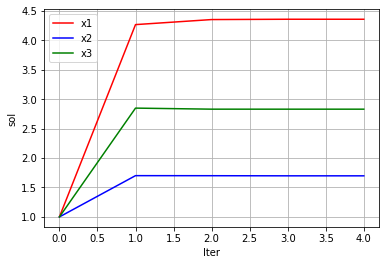

In [108]:
A = np.array([[12.,-3.,1.],[-1.,6.,-1.],[1.,6.,9.]])
b = np.array([50.,3.,40.])
x = np.array([1.,1.,1.])
rlambda = 0.95
es = 0.05
sol,solx,iter = GSeidel(A,b,x,100,es,rlambda)
